# Linear Regression

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('Resources/cleaned_us_data.csv'))
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,7,34662,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,...,2,0.15,3.4196,54.64,High,2011,2011-01,15.0,145.333,143.6232
1,27,37844,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,...,6,0.30,-172.1172,70.05,High,2011,2011-01,30.0,105.686,134.3722
2,32,31454,CA-2011-104269,2011-01-03,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,...,2,0.20,51.4764,47.89,Medium,2011,2011-01,20.0,228.784,203.0458
3,34,39607,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,...,3,0.30,-43.0296,32.70,Medium,2011,2011-01,30.0,125.503,139.8462
4,36,39245,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,...,6,0.30,0.0000,25.22,Medium,2011,2011-01,30.0,60.375,60.3750


In [3]:
# Drop rows where sub-category is equal to copiers and machines 
df[df['Sub-Category'].str.contains("Copiers") == False]
df[df['Sub-Category'].str.contains("Machines") == False]

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,7,34662,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,...,2,0.15,3.4196,54.64,High,2011,2011-01,15.0,145.333,143.6232
1,27,37844,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,...,6,0.30,-172.1172,70.05,High,2011,2011-01,30.0,105.686,134.3722
2,32,31454,CA-2011-104269,2011-01-03,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,...,2,0.20,51.4764,47.89,Medium,2011,2011-01,20.0,228.784,203.0458
3,34,39607,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,...,3,0.30,-43.0296,32.70,Medium,2011,2011-01,30.0,125.503,139.8462
4,36,39245,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,...,6,0.30,0.0000,25.22,Medium,2011,2011-01,30.0,60.375,60.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,51222,31942,CA-2014-126221,2014-12-31,2015-06-01,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,...,2,0.00,56.5110,8.32,Medium,2014,2014-12,0.0,104.650,76.3945
9982,51225,32205,CA-2014-143259,2014-12-31,2015-04-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,...,3,0.20,19.7910,7.21,High,2014,2014-12,20.0,17.592,10.9950
9983,51246,32594,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,2,0.20,6.4750,2.06,Medium,2014,2014-12,20.0,10.360,7.1225
9984,51250,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,...,2,0.20,4.5188,0.89,Medium,2014,2014-12,20.0,6.952,4.6926


In [4]:
X = df[["Shipping Cost"]]
X.head()

,Shipping Cost
0,54.64
1,70.05
2,47.89
3,32.70
4,25.22


In [5]:
y = df.Sales

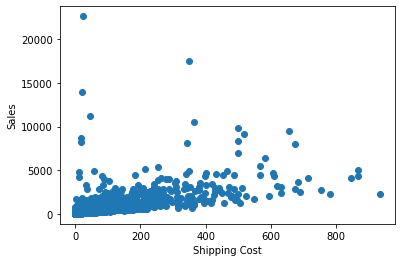

In [6]:
plt.scatter(df["Shipping Cost"], df["Sales"])
plt.xlabel("Shipping Cost"),
plt.ylabel("Sales")
plt.show()

In [7]:
# Create a model with scikit-learn
model = LinearRegression()

In [8]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [9]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(9986,)


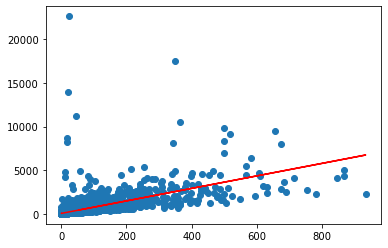

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [11]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[7.16371946]
59.24271313567914


# Multiple Linear Regression

In [12]:
X = df[["Segment","Category","Sub-Category","Quantity","Shipping Cost","Profit","Discount","Order Priority", "Ship Mode"]]
X = pd.get_dummies(X, columns = ["Segment", "Category", "Sub-Category","Order Priority","Ship Mode"])
y = df["Sales"]

In [13]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [15]:
y_prediction =  LR.predict(x_test)
y_prediction

array([  7.62401622, 272.44967691, -25.80046669, ..., 305.13720323,
        51.5548186 ,  43.70039935])

In [16]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print (score)

0.17771659280115204


In [17]:
# Calculate MSE (mean square error)
mean_squared_error(y_test,y_prediction)

423605.75610791956

In [18]:
# RMSE (root mean square error)
import numpy as np
np.sqrt(mean_squared_error(y_test,y_prediction))

650.8500258184827

# Multiple Linear Regression with Sales as target

In [19]:
X = df[[ "Shipping Cost"]]
# X = pd.get_dummies(X, columns = ["Category"])
y = df["Sales"]

In [20]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [22]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 50.78485138, 148.01701211,  49.3313415 , ..., 301.01805181,
        73.42900525,  87.27559935])

In [23]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print (score)

0.23905787121950017


In [24]:
# Calculate MSE (mean square error)
mean_squared_error(y_test,y_prediction)

392005.31470591144

In [25]:
# RMSE (root mean square error)
import numpy as np
np.sqrt(mean_squared_error(y_test,y_prediction))

626.103277986876

# Linear Regression (Sales and Profit)

In [26]:
X = df[["Sales"]]
X.head()

,Sales
0,290.666
1,634.116
2,457.568
3,376.509
4,362.250


In [27]:
y = df.Profit

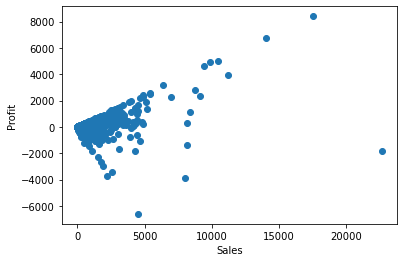

In [28]:
plt.scatter(df["Sales"], df["Profit"])
plt.xlabel("Sales"),
plt.ylabel("Profit")
plt.show()

In [29]:
# Create a model with scikit-learn
model = LinearRegression()

In [30]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [31]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(9986,)


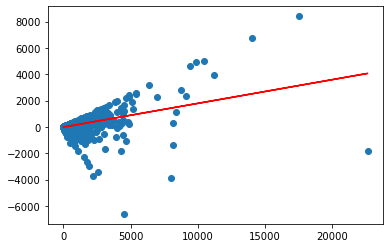

In [32]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [33]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[0.18006464]
-12.751850387260365


## Multiple Linear Regression for all the countries vs sales

In [4]:
# Read csv to a dataframe
df = pd.read_csv(Path('Resources/cleaned_superstore_master.csv'), index_col=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,2,0.0,106.140,35.46,Medium,2011,2011-01,0.0,204.150,151.08
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,3,0.1,36.036,9.72,Medium,2011,2011-01,10.0,40.122,28.11
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,4,0.0,29.640,8.17,High,2011,2011-01,0.0,16.530,9.12
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,3,0.5,-26.055,4.82,High,2011,2011-01,50.0,14.955,23.64
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,5,0.1,37.770,4.70,Medium,2011,2011-01,10.0,22.734,15.18


In [5]:
# Drop rows where sub-category is equal to copiers and machines 
df[df['Sub-Category'].str.contains("Copiers") == False]
df[df['Sub-Category'].str.contains("Machines") == False]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,2,0.0,106.1400,35.46,Medium,2011,2011-01,0.0,204.150,151.0800
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,3,0.1,36.0360,9.72,Medium,2011,2011-01,10.0,40.122,28.1100
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,4,0.0,29.6400,8.17,High,2011,2011-01,0.0,16.530,9.1200
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,3,0.5,-26.0550,4.82,High,2011,2011-01,50.0,14.955,23.6400
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,5,0.1,37.7700,4.70,Medium,2011,2011-01,10.0,22.734,15.1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51250,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,2,0.2,4.5188,0.89,Medium,2014,2014-12,20.0,6.952,4.6926
51251,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,1,0.0,0.4200,0.49,Medium,2014,2014-12,0.0,3.990,3.5700
51252,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,3,0.0,12.3600,0.35,Medium,2014,2014-12,0.0,8.800,4.6800
51253,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,1,0.0,0.5600,0.20,Medium,2014,2014-12,0.0,7.120,6.5600


In [27]:
X = df[["Segment","Category","Sub-Category","Market", "Region","Shipping Cost","Country","Discount","Profit","Quantity","Order Priority", "Ship Mode"]]
X = pd.get_dummies(X, columns = ["Segment", "Category", "Sub-Category","Market","Country","Region","Order Priority","Ship Mode"])
y = df["Sales"]

In [28]:
X.shape

(51255, 202)

In [21]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [11]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [22]:
r2_score(y_train, LR.predict(x_train_scaled))

C:\Users\Administrator\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-1.9000183061376643

In [23]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 245.0629411 ,  643.18987283,   10.99338806, ...,   -4.02836063,
       -148.24190841,  281.93623889])

In [25]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print (score)

0.7382652933365476


In [17]:
# Calculate MSE (mean square error)
mean_absolute_error(y_test,y_prediction)

110.40160440047804